<a href="https://colab.research.google.com/github/niloy1601107/Data-School-ML_course/blob/main/dataschool_advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# reading the file from csv 
df = pd.read_csv('Advertising.csv',index_col = 0)
#indexing takes the selected colomn for indexing

df.head() #first five rows of data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.tail() #last five rows of data

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# these are used to get a glance over the dataset
df.shape
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# **The response variable is continuos, so it's a Regression problem**
- TV radio newspaper is the **feature set**
- Sales is the **target set (Response set)**

In [5]:
#checking for null values
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

# **Visualizing the data with seaborn**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


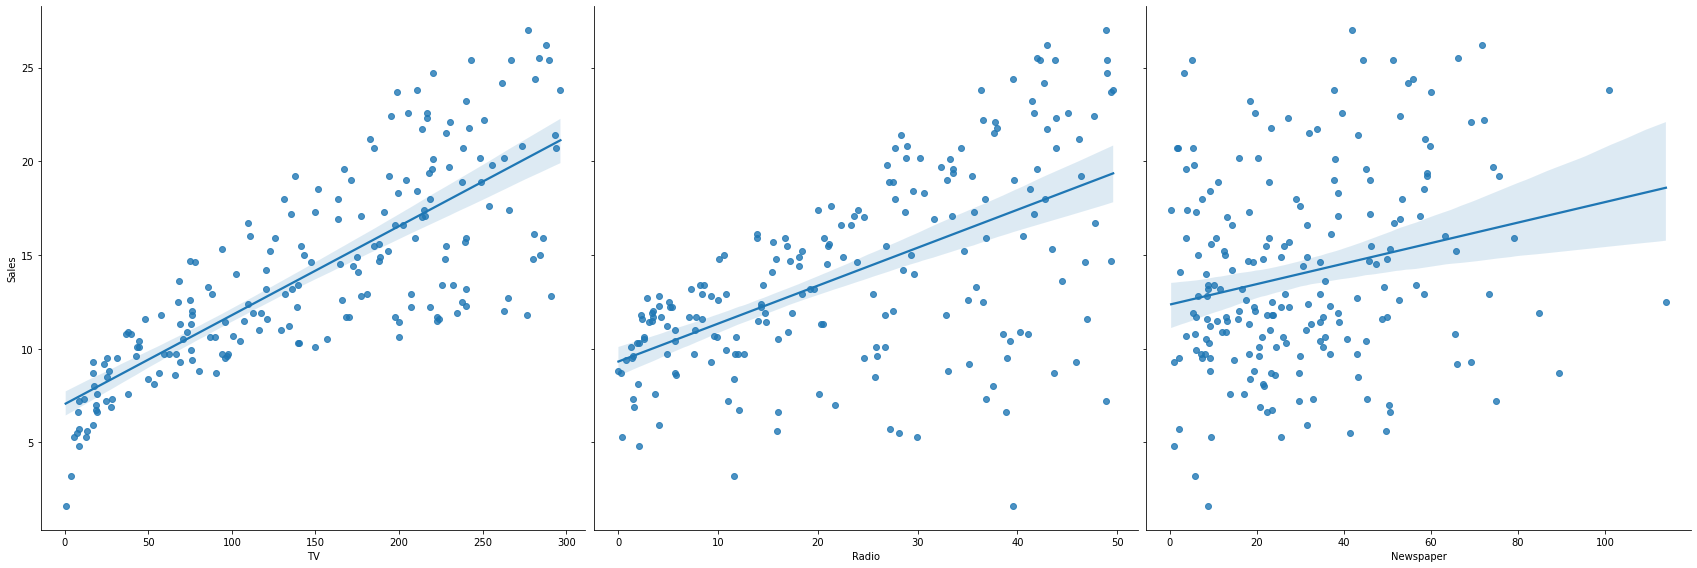

In [6]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size =8,kind = 'reg') #pairs of scatter plot

# **So it is a linear regression problem**

In [7]:
# to use pandas for X and Y preparation
# X is the features

X = df[['TV','Radio','Newspaper']] # inner bracket is for the list
X.head()
X.shape

(200, 3)

In [8]:
# Y is the target
Y = df['Sales'] 
Y.shape

(200,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.7,random_state=1)
X_train.shape

(140, 3)

# **intercept and coefficient**

In [22]:
# model building
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train,Y_train)

# coef_ only exists after the model is fitted
linReg.coef_
linReg.intercept_

2.937215734690609

In [33]:
linReg.coef_

array([0.04695205, 0.17658644, 0.00185115])

# **Y = 0.04695205 * TV + 0.17658644 * Radio + 0.00185115 * Newspaper**

In [25]:
pred = linReg.predict(X_test)
pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

# **Scoring the linReg**
- Mean Absolute Error (MAE)
- Mean Square Error (MSE)
- Root Mean Square Error (RMSE)

In [30]:
# RMSE for scoring the model

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test,pred))

1.388857410775697

In [39]:
# Newspaper has a lesser impact on the model. So it can be omitted.
features = df[['TV','Radio']]
# Y is same as before

feat_train, feat_test, Y_train, Y_test = train_test_split(features,Y,random_state=1, test_size=.35)

In [46]:
linReg.fit(feat_train,Y_train)
linReg.coef_
newPred = linReg.predict(feat_test)
newPred

array([21.78518122, 16.41504979,  7.6696579 , 17.77112442, 18.59915829,
       23.75552235, 16.30544507, 13.3130577 ,  9.17878545, 17.24769321,
       14.40611826,  9.93626071, 17.28847037, 16.79659314, 14.91421766,
       15.538933  , 12.43614578, 17.15946707, 11.30432477, 18.10867271,
        9.38448526, 12.81283949,  8.85159485, 10.51123692, 11.38610287,
       14.99726699,  9.86472877, 19.42802878, 18.36680787, 17.12675746,
       21.64802738, 14.43873265, 16.40871736, 12.27596939, 19.97588643,
       15.36556598, 13.88048397, 10.00997941, 21.02071512,  7.57482997,
        3.67612197,  7.22418628,  6.07185664, 18.42528998,  8.46880474,
       14.1606187 , 15.15600617, 20.40481687, 20.69552492, 19.48754203,
       24.0917579 , 14.99881166,  6.81660923, 19.8630223 , 18.90608035,
       12.46564157, 14.06591526,  6.16156557, 15.27794859,  9.71397007,
       12.03317421, 12.0743241 ,  8.70997227, 21.60454177, 23.21558738,
       12.33316732,  6.69879209, 17.83726801, 16.36718658,  8.94

In [48]:
np.sqrt(mean_squared_error(Y_test,newPred))

1.507565118559091